# Eksamen i videregående økonometri - Januar 2019 
#### Aalborg Universitet - cand.oecon
Lars Børty Nielsen - Andreas Gravers Klitgaard - Jens Stoustrup Ehmsen


- **Opgave 1** Huspriser i Norden: Kointegration [25%]
- **Opgave 2** Huspriser i Norden: Forecasting [15%]
- **Opgave 3** ARCH-in-mean [10%]
- **Opgave 4** Vektorautoregressive modeller [50%]

In [1]:
suppressMessages(library(tidyverse)) # Readr, ggplot, dplyr, ...
suppressMessages(library(gridExtra)) # Arrangning ggplots
suppressMessages(library(readxl))    # Loading excel
suppressMessages(library(repr))      # Resizing the plots in jupyter
suppressMessages(library(rugarch))   # For ARCH and GARCH models
suppressMessages(library(dynlm))     # Lagged linear models
suppressMessages(library(urca))      # Dick Fuller test
suppressMessages(library(car))       # Linear hyphothesis testing
suppressMessages(library(tseries))   # Adf-test
suppressMessages(library(vars))      # VAR models
suppressMessages(library(zoo))       # Convert quarters to date
suppressMessages(library(forecast))  # Help in plotting TS
suppressMessages(library(fGarch))    # The library Lasse uses to do GARCH
suppressMessages(library(expm))      # Matrix calculations 
suppressMessages(library(tsDyn))     # VECM models

options(repr.plot.width=8, repr.plot.height=2.5, warn=-1)

# **Opgave 1** Huspriser i Norden: Kointegration [25%]

#### **Spørgsmål 1.1** Formel definition af kointegration

Kointegration omhandler grundlæggende, at to eller flere ikke-stationære variable kan have en fælles stokastisk trend, og der kan derfor findes en lineær kombination af disse variable, som er stationær og dermed udligner de respektive stokastiske trends. Hvis dette er tilfældet, så siges disse variable at være kointegrerede. Det gælder desuden, at kointegrerede variable skal være integreret af samme orden. Man kan således ikke have kointegration mellem en variabel der følger en 𝐼(1)-proces, og en variabel der følger en 𝐼(2)-proces. 

Hvis vi således har en vektor $x_t$ der indeholder alle de respektive variable fra kointegrationen: $x_t=(x_{1p},x_{2p}.,x_{nt})$. Disse variable siges i denne forbindelse at være integreret af orden d. Ydermere gælder det, at hvis disse variable er kointegrerede, så gælder det, at der eksisterer en vektor $\beta=(\beta_1,\beta_2,., \beta_n)$ så den lineære kombination $\beta x_t=\beta_1 x_{1t}+\beta_2 x_{2t} + ... \beta_n x_nt$ af de kointegrerede variable $x_t$ er integreret af orden $d-b$, hvor $b>0$ eller at $\beta' x_t I~(d-b)$. Denne $\beta$-vektor kaldes derfor for kointegrationsvektoren. 

Hvis vi har et eksempel hvor $z_t ~ I(d)$ og $y_t ~ I(d)$ er kointegrerede, så vil disse altså være kointegreret ved $x_t=(z_t,y_t ) ~ CI(b,d)$

En central karakteristika ved kointegrerede variable er desuden, at deres tidsserier vil være påvirket af eventuelle afvigelser fra de to variables langsigtede ligevægt. Denne langsigtede ligevægt fås ved at regressere de kointegrerede variable på hinanden. Hvis disse to variable skal bevæge sig tilbage mod deres langsigtede ligevægt, så må mindst en af variablene i kointegrationen reagere på denne afvigelse. Til at beskrive denne tilpasning opstilles såkaldte fejlkorrektionsmodeller. Er der således kointegration mellem to variable, så vil der også være en fejlkorrektionsmodel, som sikre at tidsserierne for de respektive variable vil bevæge sig i retning af den langsigtede ligevægt.

Hvis vi fortsat tager udgangspunkt i eksemplet med $y_t$ og $z_t$, så kunne et eksempel på en langsigtet ligevægt være $y_t = ?? + \beta z_t + u_t$, og så vil en fejlkorrektionsmodel til denne kointegration være:

$$\Delta y=\alpha_1 (y_{t-1}-\mu-\beta z_{t-1} )+v_{yt}$$

$$\Delta z=\alpha_2 (y_{t-1}-\mu-\beta z_{t-1} )+v_{zt}$$

Det gælder i denne forbindelse at $\alpha_1<0$ og $\alpha_1>0$ og disse to størrelser kaldes for tilpasningshastighederne, da de illustrerer hvor hurtigt de to tidsserier vil bevæge sig tilbage mod den langsigtede ligevægt. Har vi således et scenarier, hvor et stød forårsager at $y_(t-1)> ??-\beta z_(t-1)$, så kan tilpasningen enten ske ved at $y_t$ falder, $z_t$ stiger eller at begge de to tidsserier ændrer sig. Er de to variable kointegreret, så vil de to tidsserier altså bevæge sig mod den langsigtede ligevægt. 

#### **Spørgsmål 1.2** Intuitativ forklaring af kointegration
På baggrund af ovenstående vil der således være tale om kointegration, når to eller flere variable har en fælles stokastisk trend. Har disse variable en fælles stokastisk, så kan der findes en lineær kombination af disse variable, som er stationær og dermed udligner de respektive stokastiske trends. Denne kointegration opstår således, hvis vi kan regressere disse variable på hinanden og at fejlledene for denne regression er stationære. Denne regression mellem variablene vil desuden udtrykke disse variables langsigtede ligevægt. I modsætning til spuriøs regression, så vil kointegration altså være en meningsfuld regression mellem to eller flere ikke-stationære tidsserier. Man kan dog, som nævnt tidligere, ikke have en kointegration mellem variable af forskellige ordner. Indenfor økonomisk analyse vil langt størstedelen af de variable vi arbejder med imidlertid ofte være 𝐼(1)-processer. 

En central karakteristika ved kointegrerede variable er desuden, at deres tidsserier vil være påvirket af eventuelle afvigelser fra de to variables langsigtede ligevægt (fra regressionen). Visuelt vil man dog ikke altid kunne se på to tidsserier, at de er kointegrerede, da de i nogle tilfælde bare vil bevæge sig væk fra hinanden over den tidsperiode, som man datamæssigt har til rådighed.

#### **Spørgsmål 1.3** Test af stationaritet
*Plot de 3 prisindeks og foretag test for stationaritet af de 3 indeks. Husk at beskrive din fremgangsmåde og hvordan du kommer frem til konklussionen, herunder nulhypotesen, kritiske værdier og en eksplicit specifikation af dine regressionsligninger*

In [2]:
var <- read_delim("C:/Users/larsn/Desktop/var.csv", 
    ";", escape_double = FALSE, locale = locale(decimal_mark = ","), 
    col_type = cols(dato = col_character(),
                    DEN = col_double(),
                    SWE = col_double(),
                    NOR = col_double()),
    trim_ws = TRUE)

var$dato <- seq(as.Date("1975-01-01"), length = 174, by = "quarter")

1. Vi starter med at plotte de tre tidsserier for at grafisk inspeciere dem. Her ser de ikke ud til at hverken have en konstant varians, eller at følge 
2. Vi følger general to specific fremgangsmåden, og finder hhv. 5, 8 og 11 lags er passende for modellen for Danmark, Sverige og Norge.
3. Vi præsenterer Dickey Fuller fremgangsmådel som vi følger for Danmark som et eksempel
  - Vi finder at i en model med drift og trend (reg1) hverken kan afvise unit root ved $\tau_t$, $\phi_2$ eller $\phi_3$ og dermed kan vi ikke afvise at serien indeholder en unit root.
  - For modellen med kun drift (reg2) kan vi heller ikke afvise $\tau_\mu$ eller $\phi_1$
  - Modellen uden drift (reg3) kan vi heller ikke afvise unit root for $\gamma$ ved $\tau$ kritiske værdier (Denne har vi opskrevet)
4. Vi konkulderer derfor at det danske boligprisindeks er en unit root process, altså den indeholder en stokastisk trend. 
  - Det samme gælder for Norge og Sverige, de endelige modelspecifikationer er præsenteret herunder:


**Endelige model for Danmark**

$$
\Delta DEN_t = \gamma DEN_{t-1} + \beta_1\Delta DEN_{t-1} + \beta_2\Delta DEN_{t-2} + \beta_3\Delta DEN_{t-3} + \beta_4\Delta DEN_{t-4} + \beta_5\Delta DEN_{t-5} + \varepsilon_t
$$

**Endelige model for Sverige**

$$
\Delta SWE_t = \mu + \gamma SWE_{t-1} + \beta_1\Delta SWE_{t-1} + \beta_2\Delta SWE_{t-2} + \beta_3\Delta SWE_{t-3} + \beta_4\Delta SWE_{t-4} + \beta_5\Delta SWE_{t-5} + \beta_6\Delta SWE_{t-6} + \beta_7\Delta SWE_{t-7} + \beta_8\Delta SWE_{t-8} + \beta_9\varepsilon_t
$$

**Endelige model for Norge**

$$
\Delta NOR_t = \mu + \gamma NOR_{t-1} + \beta_1\Delta NOR_{t-1} + \beta_2\Delta NOR_{t-2} + \beta_3\Delta NOR_{t-3} + \beta_4\Delta NOR_{t-4} + \beta_5\Delta NOR_{t-5} + \beta_6\Delta NOR_{t-6} + \beta_7\Delta NOR_{t-7} + \beta_8\Delta NOR_{t-8} + \beta_9\Delta NOR_{t-9} + \beta_{10}\Delta NOR_{t-10} + \beta_{11}\Delta NOR_{t-11} + \beta_9\varepsilon_t
$$

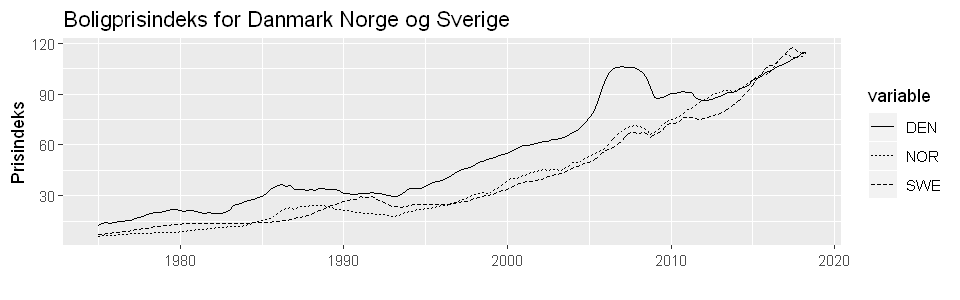

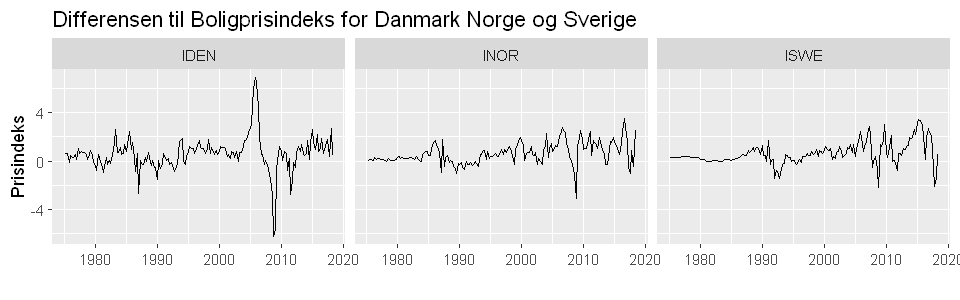

In [3]:
p1 <- var %>% 
  gather(variable, value, -dato) %>% 
  ggplot(aes(dato, value, linetype=variable)) +
  geom_line() + 
  labs(title="Boligprisindeks for Danmark Norge og Sverige", x="", y="Prisindeks")

DEN <- as.ts(var$DEN);SWE <- as.ts(var$SWE);NOR <- as.ts(var$NOR)
lDEN <- diff(DEN);lSWE <- diff(SWE);lNOR <- diff(NOR)

p2 <- data.frame(dato = var$dato[-1], lDEN, lSWE, lNOR) %>% 
  gather(variable, value, -dato) %>% 
  ggplot(aes(dato, value)) +
  geom_line() + 
  scale_y_continuous() +
  facet_wrap(~variable) +
  labs(title="Differensen til Boligprisindeks for Danmark Norge og Sverige", x="", y="Prisindeks")

print(p1); print(p2)

**Augmented Dickey Fuller test**
$$
\Delta y_t = a_0 + \gamma y_{t-1} + a_2t + \sum^p_{i=2}\beta_i\Delta y_{t-i+1} + \varepsilon_t
$$

**Dickey Fuller test**
$$
\begin{aligned}
\Delta y_t = a_0 + \gamma y_{t-1} + a_2t + \varepsilon_t \qquad \qquad
\gamma &= 0 \qquad \tau_1 \\
a_2 = \gamma &= 0 \qquad \phi_3 \\
a_0 = a_2 = \gamma &= 0 \qquad \phi_2 \\
\\
\Delta y_t = a_0 + \gamma y_{t-1} + \varepsilon_t \qquad \qquad
\gamma &= 0 \qquad \tau_2 \\
a_0 = \gamma  &= 0 \qquad \phi_1 \\
\\
\Delta y_t = \gamma y_{t-1} + \varepsilon_t \qquad \qquad
\gamma &= 0 \qquad \tau_3 \\
\end{aligned}
$$

In [4]:
#summary(dynlm(lDEN ~ L(DEN) + L(lDEN) + L(lDEN,2) + L(lDEN,3) + L(lDEN,4) + L(lDEN,5)))
#summary(dynlm(lSWE ~ L(SWE) + L(lSWE) + L(lSWE,2) + L(lSWE,3) + L(lSWE,4) + L(lSWE,5) + L(lSWE,6) + L(lSWE,7) + L(lSWE,8)))
#summary(dynlm(lNOR ~ L(NOR) + L(lNOR) + L(lNOR,2) + L(lNOR,3) + L(lNOR,4) + L(lNOR,5) + L(lNOR,6) + L(lNOR,7) + L(lNOR,8) + L(lNOR,9) + L(lNOR,10) + L(lNOR,11)))

# Regressioner for ADF for Danmark
reg1 <- dynlm(lDEN ~ L(DEN) + seq_along(lDEN) + L(lDEN) + L(lDEN, 2) + L(lDEN, 3) + L(lDEN, 4) + L(lDEN, 5))
reg2 <- dynlm(lDEN ~ L(DEN) + L(lDEN) + L(lDEN, 2) + L(lDEN, 3) + L(lDEN, 4) + L(lDEN, 5))
reg3 <- dynlm(lDEN ~ 0 + L(DEN) + L(lDEN) + L(lDEN, 2) + L(lDEN, 3) + L(lDEN, 4) + L(lDEN, 5))

De tre modeller for Danmark

In [5]:
t1 <- summary(reg1)$coefficients["L(DEN)", "t value"]
p3 <- linearHypothesis(reg1, c("L(DEN) = 0", "seq_along(lDEN) = 0", "(Intercept) = 0"), test="F")$F[2]
p2 <- linearHypothesis(reg1, c("L(DEN) = 0", "seq_along(lDEN) = 0"), test="F")$F[2]
cv1 <- summary(ur.df(y=DEN, type="trend"))@cval

t2 <- summary(reg2)$coefficients["L(DEN)", "t value"]
p1 <- linearHypothesis(reg2, c("L(DEN) = 0", "(Intercept) = 0"), test="F")$F[2]
cv2 <- summary(ur.df(y=DEN, type="drift"))@cval

t3 <- summary(reg3)$coefficients["L(DEN)", "t value"]
cv3 <- summary(ur.df(y=DEN, type="none"))@cval

df <- as.data.frame(rbind(cbind(test = c(t1,p3,p2), cv1),cbind(test=c(t2,p1), cv2), cbind(test=c(t3),cv3)))
df$significant <- ifelse(abs(df$test)>abs(df$"5pct"), "TRUE", "FALSE")

rbind(as.matrix(df))

,test,1pct,5pct,10pct,significant
tau3,-2.724824,-3.99,-3.43,-3.13,FALSE
phi2,3.714254,6.22,4.75,4.07,FALSE
phi3,3.898668,8.43,6.49,5.47,FALSE
tau2,-0.227157,-3.46,-2.88,-2.57,FALSE
phi1,1.631267,6.52,4.63,3.81,FALSE
tau1,1.377725,-2.58,-1.95,-1.62,FALSE


Til sidst tester vi alle med adf.test og finder at vi ikke kan afvise unit root i nogen af tidsserierne

In [6]:
rbind(adf.test(var$DEN, k = 5), 
      adf.test(var$SWE, k = 8), 
      adf.test(var$NOR, k = 11))[,c(1:4,6)]

statistic,parameter,alternative,p.value,data.name
-2.724824,5,stationary,0.2735167,var$DEN
0.01181043,8,stationary,0.99,var$SWE
-0.1267384,11,stationary,0.99,var$NOR


#### **Spørgsmål 1.4** Kointegration - Engel Granger
*Er de 3 boligprisindeks kointegreret? Brug Engle-Granger fremgangsmåden samlet på de 3 indeks. Redegør for din fremgangsmåde og hvordan du kommer frem til konklussionen, herunder dine valg af deterministiske komponenter i regressionen, kritiske værdier og en eksplicit specifikation af dine regressionsligninger.*

Engel Granger metodologien består af 4 steps, men de første 2 er nok til at afgøre om serierne cointegrerer:

1. Test efter unitroot med Augmented Dickey Fuller test 

Dette er gjort i foregående opgave og det viste at alle tre variabler er integreret af første orden I(1)
  
2. Estimer den langsigtede ligevægt med OLS, se på signifikansen af interceptet og om residualet er stationært (her kan de ordinære ADF fordelinger ikke anvendes, vi har derfor simuleret de kritiske værdier med Monte Carlo simulering)

Vores udgangspunkt er en langsigtet sammenhæng i form af modellen: (Der findes tre forskellige, men vi tager udgangspunkt i Danmark som uafhængig variabel)

**Langsigtede ligevægt**
$$ DANMARK_t = \beta_0 + \beta_{1}NORGE_t + \beta_{2}SVERIGE_t + e_t$$

**Sikrer stationært residual - Dickey Fuller**
$$ \Delta\hat{e_t} = a_1\hat{e}_{t-1} + \varepsilon_t $$

**Sikrer stationært residual - Augmented Dickey Fuller**
$$ \Delta\hat{e_t} = a_1\hat{e}_{t-1} \sum^{n}_{i=1}a_{i+1}\Delta\hat{e}_{t-i}+ \varepsilon_t $$

Interceptet er meget signifikant, og test for residualet med DF med Engel-Granger fordeling skal være mindre end -3.802 (3 variabler, 174 observationer og drift) for at kunne afvise en unit root og derfor konkludere at residualet er ikke stationært, estimatet er -1.273, Da vi ikke kan kan forkaste en unit root anvender vi ADF. Vi finder at lag længden er 6 (jf. general to specific), og med dette er t-værdien på modellen -2.687, hvilket ikke ændrer konklusionen, variablerne er ikke cointegrerede.

Vi ved dog at i Engel-Granger metodologien er valget af den unafhængige variabel vigtig, og vi førsøger derfor med både Norge og Sverige som ufafhængig i den langsigtede ligevægt. Vi finder her at med ADF kan vi konludere at variablerne er cointegrerede af orden CI(1,1) (-5.313 for Sverige og -4.843 for Norge, begge ved 6 lags)

In [7]:
lm(DEN ~ SWE + NOR)


Call:
lm(formula = DEN ~ SWE + NOR)

Coefficients:
(Intercept)          SWE          NOR  
    16.3068      -0.4255       1.3369  


Vi kan ikke anvende den normale t-statistik, og anvender derfor følgendende simulerede kritiske værdier:

In [8]:
EG3 <- NA
for (i in 1:5000) {
    x1 <- as.ts(cumsum(rnorm(174)))
    x2 <- as.ts(cumsum(rnorm(174)))
    x3 <- as.ts(cumsum(rnorm(174)))
    res <- as.ts(lm(x1 ~ x2 + x3)$residuals)
    a <- summary(dynlm(res ~ L(res)))
    EG3[i] <- (a$coefficients["L(res)", "Estimate"] - 1)/a$coefficients["L(res)", "Std. Error"]
}
rbind(quantile(EG3, probs = c(0.01,0.05,0.10)))

1%,5%,10%
-4.375684,-3.781655,-3.480008


In [9]:
reg <- lm(DEN ~ SWE + NOR)
res <- as.ts(reg$residuals); dres <- diff(res)
a1 <- summary(dynlm(dres ~ L(res,1)))$coefficients["L(res, 1)", "t value"]
b1 <- summary(dynlm(dres ~ L(res,1) + L(dres,1)  + L(dres,2)  + L(dres,3)  + L(dres,4)  + L(dres,5)  + L(dres,6)))$coefficients["L(res, 1)", "t value"]

reg <- lm(SWE ~ DEN + NOR)
res <- as.ts(reg$residuals); dres <- diff(res)
a2 <- summary(dynlm(dres ~ L(res,1)))$coefficients["L(res, 1)", "t value"]
b2 <- summary(dynlm(dres ~ L(res,1) + L(dres,1)  + L(dres,2)  + L(dres,3)  + L(dres,4)  + L(dres,5)  + L(dres,6)))$coefficients["L(res, 1)", "t value"]

reg <- lm(NOR ~ DEN + SWE)
res <- as.ts(reg$residuals); dres <- diff(res)
a3 <- summary(dynlm(dres ~ L(res,1)))$coefficients["L(res, 1)", "t value"]
b3 <- summary(dynlm(dres ~ L(res,1) + L(dres,1)  + L(dres,2)  + L(dres,3)  + L(dres,4)  + L(dres,5)  + L(dres,6)))$coefficients["L(res, 1)", "t value"]

cbind(Country = c("DK", "NOR", "SWE"), DF = round(c(a1,a2,a3),4), ADF = round(c(b1,b2,b3),4), Lags = c(6,6,6), 
      DF.signf = ifelse(c(a1,a2,a3)< -3.73, TRUE, FALSE), ADF.signf = ifelse(c(b1,b2,b3)< -3.73, TRUE, FALSE))

Country,DF,ADF,Lags,DF.signf,ADF.signf
DK,-1.2729,-2.6871,6,FALSE,FALSE
NOR,-1.4068,-5.314,6,FALSE,TRUE
SWE,-1.6977,-4.8431,6,FALSE,TRUE


Næste step i Engel-Granger fremgangsmådel er at estimere en fejlkorrektionsmodel

#### **Spørgsmål 1.5** Kointegration - Johansen 
*Johansen metoden er et alternativ til Engle-Granger. Hvad er fordelene ved Johansen metoden?*

ohansen-metoden er sammenlignet med Engle-Granger metoden mere effektiv. I Engle-Grangerframeworket skal man således i første omgang estimere den langsigtede ligevægt.  Estimeringen af den langsigtede ligevægt kan dog i de tilfælde, hvor du har mange variable være en anelse kompliceret. Det kan således være vanskeligt at afgøre, hvilken af de respektive variable der skal være den afhængige, og hvilke der skal være de forklarende/uafhængige. Dette er imidlertid en afgørende beslutning, da beslutningen omkring kointegration i Engle-Granger-frameworket i nogle tilfælde kan være følsom overfor denne beslutning. I Johansen-metoden anvender man i stedet blot trace-test $\gamma_{trace}$ og maximum-eigenvalue-test $\gamma_{max}$. Disse to tests anvendes til at bestemme, hvorvidt de respektive variable er kointegrerede og samtidig antallet af kointegrationsvektorer. En anden fordel er således, at konklusionen i Johansen-metoden bliver fundet i et trin, da den anvender sammenhængen mellem rangen af en matrix og dennes karakteristiske rødder. I modsætning hertil laver Engle-Granger-frameworket to forskellige estimeringer af både den langsigtede ligevægt og en ADF-test på fejlledet fra den regression. Der er således en større mulighed for at begå fejl i EG-frameworket.  

Herudover giver Johansen-metoden også mulighed for at indføre deterministiske led, som en konstant eller trend, i kointegrationsrelationen. 

#### **Spørgsmål 1.6** Trace- og Max test
*Gør kort rede for Trace test og Maximum Eigenvalue test, herunder hvorfor vi betragter egenværdier og hvordan de indgår i testene*

I Trace-test og maximum-eigenvalue-test kigger man grundlæggende på rangen af \pi-matricen, da rangen af denne matrice netop beskriver antallet af kointegrationsrelationer. I den forbindelse gælder det, at \pi-matricen er en koefficientmatrice, der kan defineres ved:

$$\pi=\alpha\beta'$$

I ovenstående udtryk er $\alpha$ matricen der indeholder tilpasningsparametrene fra fejlkorrektionsmodellen, og $\beta$ er kointegrationsvektoren. 

Det gælder desuden, at hvis ranken af $\pi=0$, så har vi ingen kointegration mellem de respektive variable. I stedet er alle variablene integreret af 1. orden (I(1)-processer). Vi skal således tage differensen af de enkelte tidsserier før vi eksempelvis kan anvende dem i en VAR-model, men der er ikke tale om kointegration. Har vi derimod fuld rang; $r(\pi)=n$, hvor n er udtryk for antallet af variable i kointegrationen, så vil alle de respektive variable være stationære, hvorfor der heller ikke er tale om kointegration. Vi har således i de tidligere opgaver arbejdet med tre variable, hvorfor fuld rang i dette tilfælde vil være 3. 

Hvis $\pi$-matricen omvendt har reduceret rang; $0<rank(\pi)=r<n$, så vil der være r kointegrationsrelationer og n-r stokastiske trends. I dette tilfælde vil der således være tale om kointegration mellem de respektive variable. Desuden ved vi at rangen af en matrice svarer til antallet af karakteristiske rødder eller egenværdier, der er forskellige fra 0. 

I praksis kan vi dog kun opnå estimater af $\pi$ og de karakteristiske rødder. Trace- og maximum-eigenvalue-test tester netop for antallet af kointegrationsrelationer og antallet af karakteristiske rødder (egenværdier) der er forskellige fra nul. Teststatistikken for trace-testen og max-testen beregnes ved: 

$$\gamma_{trace} (r)=-T\sum_{i=r+1}^n ln(1-\hat\lambda_i)$$

$$\gamma_{max} (r,r+1)=-Tln(1-\hat\lambda_{r+1})$$

I ovenstående udtryk er $\hat\lambda_i$ i de estimerede værdier af de karakteristiske rødder (egenværdier) og T er antallet af brugbare observationer. 

Trace-testen har en nulhypotese der siger, at antallet af kointegrationsvektorer eller kointegrationsrelationer er mindre end eller lig med r, og den alternative hypotese vil så være, at antallet af kointegrationsvektorer eller kointegrationsrelationer er større end r; 

$$H_0:rank(\pi) \leq r$$

$$H_A:r=2,3,...,n$$

Max-testen har en nulhypotese der siger, at antallet af kointegrationsvektorer er r mod den alternative hypotese omkring at antallet i stedet er $r+1$.

$$H_0:rank(\pi)=r$$

$$H_A:rank(\pi)=r+1$$





#### **Spørgsmål 1.7** Fortolk trace- og max test
*I henhold til nedenstående output fra en Johansen kointegrationsanalyse af de 3 indeks bedes du argumentere for antallet af kointegrationsrelationer.*

I dit svar bedes du skrive de anvendte test op (hvis du ikke allerede har gjort det) og kommentere pÂ nulhypotesen. Kommer du frem til en anden konklusion sammenlignet med EngleGranger tilgangen ovenfor?

Først ser vi på trace testen, her konkluderer vi at:
- Afviser klart en rang på  0
- Kan ikke forkaste en rang på lig med eller større end 1 mod alternativet at den er større end to
- Vi konkluderer altså at rangen er 1 og der findes en kointegrerende relation mellem de tre variabler

Vi ser nu om max testen kan bekræfte hvad vi fandt:
- Vi afviser at rangen er 0
- vi kan ikke afvise at den er 1 mod alternativet at den er 2
- Vi konkluderer derfor igen det samme at rangen er 1

I forhold til Engel-Granger finder vi ikke et modsigende svar 

In [10]:
#summary(ca.jo(var[,-1], type = "trace", K = 5, ecdet = "const"))
#summary(ca.jo(var[,-1], type = "eigen", K = 5, ecdet = "const"))

# **Opgave 2** Huspriser i Norden: Forecasting [15%]

#### **Spørgsmål 2.1:** Du bedes gøre rede for den autoregressive model som beskriver data i perioden frem til fjerde kvartal 2005 (2005Q4) bedst muligt
Husk at gøre rede for din fremgangsmåde og de begreber du anvender i din argumentation.

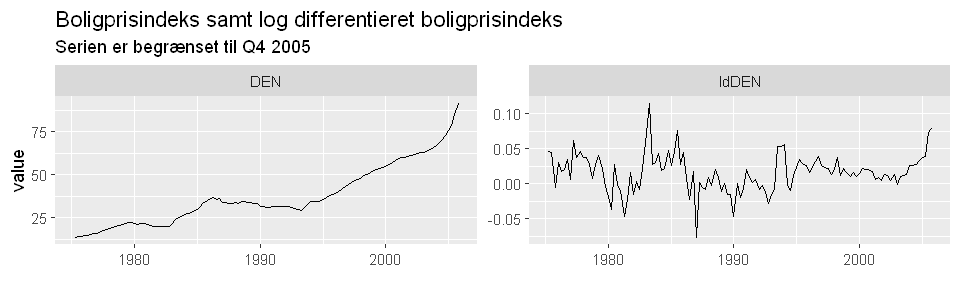

In [11]:
DEN <- var$DEN
ldDEN <- diff(log(DEN))

df <- data.frame(Dato = var$dato[-1], DEN = DEN[-1], ldDEN) %>% 
  subset(Dato<"2006-01-01")

p <- df %>% 
  gather(variable, value, -Dato) %>% 
  ggplot(aes(Dato, value)) + 
  geom_line() + 
  facet_wrap(~variable, scales="free") +
  labs(title="Boligprisindeks samt log differentieret boligprisindeks", 
       x="", subtitle="Serien er begrænset til Q4 2005")
print(p)

- Vi kan se på acf og pacf plottene at der er en væsentlig del af autokorrelation i tidsserien, og det er derfor relevant at modelere middelværdien i en AR, MA eller ARMA model.

- ACF plottet viser et stort spike omkring periode 16, dette forsvinder næsten hvis manopdeler serien og tester i to dele, derfor antager vi det er tilfældigt

- Jeg fitter 4 modeller, en AR(1), AR(2), AR(3) og en ARMA(1,1), af disse har AR(1) den laveste AIC på -579.29 og den næst laveste BIC på -570.85 (BIC straffer mange parametre i modellen hårdere end AIC). Jeg vælger dog en AR(2) eftersom denne har pænere residualer (og det er også det som auto.arima vælger).

- Vi har desuden anvendt en Ljung-Box-test til at afgøre, om der er seriel korrelation i fejlledene op til lag 4, 8 og 12, og dette er ikke tilfældet. 
 

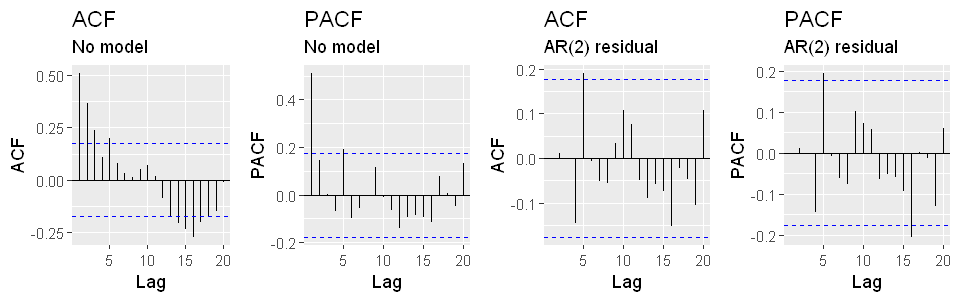

In [12]:
a <- ggAcf(df$ldDEN) + labs(title="ACF", subtitle="No model")
b <- ggPacf(df$ldDEN) + labs(title="PACF", subtitle="No model")

m1 <- arima(df$ldDEN, order=c(1,0,0))
m2 <- arima(df$ldDEN, order=c(2,0,0))
m3 <- arima(df$ldDEN, order=c(3,0,0))
m4 <- arima(df$ldDEN, order=c(1,0,1))
#auto.arima(df$ldDEN)

c <- ggAcf(m2$residuals) + labs(title="ACF", subtitle="AR(2) residual")
d <- ggPacf(m2$residuals) + labs(title="PACF", subtitle="AR(2) residual")

grid.arrange(a,b,c,d, nrow=1)

In [13]:
rbind(Box.test(m1$residuals,lag=8,type="Ljung-Box"), Box.test(m2$residuals,lag=8,type="Ljung-Box"), 
      Box.test(m3$residuals,lag=8,type="Ljung-Box"), Box.test(m4$residuals,lag=8,type="Ljung-Box"))

statistic,parameter,p.value,method,data.name
12.48369,8,0.1308921,Box-Ljung test,m1$residuals
8.277134,8,0.4068778,Box-Ljung test,m2$residuals
8.349722,8,0.4000749,Box-Ljung test,m3$residuals
8.399468,8,0.3954526,Box-Ljung test,m4$residuals


#### **Spørgsmål 2.2:** På baggrund af dine estimater på de autoregressive koeficienter bedes du for god ordens skyld afgøre om modellen er stationær. Gør brug af et diagram med enhedscirklen.


Parametrene fra modellen anvendes til at udregne rødderne:

In [14]:
rbind(m2$coef)

ar1,ar2,intercept
0.4516309,0.1760841,0.01753927


Rødderne er inden for enhedscirklen da de er numerisk mindre end 1:

In [15]:
a1 <- 0.45163094
a2 <- 0.17608406
d <- a1^2 + 4*a2

root_1 <- 0.5 * (a1 + d^0.5)
root_2 <- 0.5 * (a1 - d^0.5)

cbind(root_1, root_2)

root_1,root_2
0.7023411,-0.2507102


#### **Spørgsmål 2.3:** På baggrund af din foretrukne autoregressive model bedes du beregne et (one-step ahead) forecast for 2006Q1. 
Beskriv hvordan du gør. Dernæst udvider du din stikprøve til også at indeholde 2006Q1 og estimerer pÂny dine autoregressive parametre for samme modelspecifikation, hvorefter du beregner et forecast for 2006Q2. Proceduren gentages indtil du har forecasts for 2006Q1, 2006Q2, 2006Q3 og 2006Q4

In [16]:
ldDEN <- diff(log(DEN))

#arima(ldDEN[1:123], order=c(2,0,0))$coef
forecast1 <- 0.45163094 * ldDEN[123] + 0.17608406 * ldDEN[122] + 0.01753927
forecast1a <- 0.45163094 * ldDEN[124] + 0.17608406 * ldDEN[123] + 0.01753927
forecast1b <- 0.45163094 * ldDEN[125] + 0.17608406 * ldDEN[124] + 0.01753927
forecast1c <- 0.45163094 * ldDEN[126] + 0.17608406 * ldDEN[125] + 0.01753927

#arima(ldDEN[1:124], order=c(2,0,0))$coef
forecast2 <- 0.45849043 * ldDEN[124] + 0.18233975 * ldDEN[123] + 0.01791534

#arima(ldDEN[1:125], order=c(2,0,0))$coef
forecast3 <- 0.45650047 * ldDEN[125] + 0.17829730 * ldDEN[124] + 0.01773019

#arima(ldDEN[1:126], order=c(2,0,0))$coef
forecast4 <- 0.45673044 * ldDEN[126] + 0.16577811 * ldDEN[125] + 0.01725091

cbind(Quarter = c(1:4), 
      Model_A = c(forecast1, forecast1a,forecast1b,forecast1c), 
      Forecast = c(forecast1, forecast2, forecast3, forecast4), 
      Realised = c(ldDEN[124],ldDEN[125],ldDEN[126],ldDEN[127]))

Quarter,Model_A,Forecast,Realised
1,0.06579141,0.06579141,0.068725131
2,0.06233374,0.06366994,0.045056590
3,0.04998962,0.05055205,0.018450624
4,0.03380589,0.03314727,0.004940335


In [17]:
m1 <- arima(ldDEN[70:123], order=c(2,0,0))
m2 <- arima(ldDEN[1:123], order=c(2,0,0))

e1 <- predict(m1, n.ahead = 6)$pred - ldDEN[124:129]
e2 <- predict(m2, n.ahead = 6)$pred  - ldDEN[124:129]

dm.test(e1, e2, alternative = c("two.sided", "less", "greater"), h = 1, power = 2)

sum(abs(e1))
sum(abs(e2))


	Diebold-Mariano Test

data:  e1e2
DM = -2.7882, Forecast horizon = 1, Loss function power = 2, p-value =
0.03852
alternative hypothesis: two.sided


[1] 0.07788702

[1] 0.1065486

#### **Spørgsmål 2.4:** Plot de 4 forecast sammen med de realiserede værdier af det danske boligprisindeks.

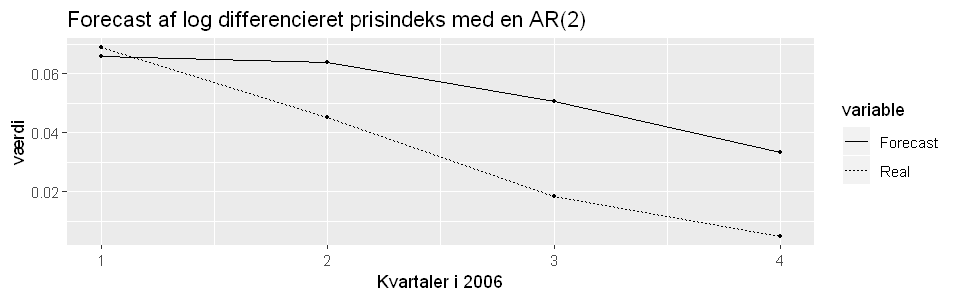

In [18]:
p <- data.frame(n = c(1:4), Forecast = c(forecast1,forecast2,forecast3,forecast4), 
                Real = c(ldDEN[124],ldDEN[125],ldDEN[126],ldDEN[127])) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value, linetype=variable)) +
  geom_point(size=0.9) +
  geom_line() +
  labs(title="Forecast af log differencieret prisindeks med en AR(2)", 
       x="Kvartaler i 2006", y="værdi")
print(p)

#### **Spørgsmål 2.5:** Diebold-Mariano testen
Forestil dig, at vi ønsker at måle forecast performance for din foretrukne autoregressive model op mod forecasts fra en benchmark model. Gør rede for hvordan Diebold-Mariano testet kan anvendes til en sammenligning af din foretrukne model og benchmark modellen.

Diebold-Mariano-testen er en test til at sammenligne forecasts fra to forskellige modeller, hvor man tager udgangspunkt i forecasts en periode frem. Man opstiller i DM-testen en værdi $d_i$, som beskriver forskellen på forecastfejlene i de to modeller i periode 𝑖: $d_i = g(e_{1i}-g(e_{2i})$. Man har således en benchmark-model og en model, som man tester denne benchmark-model imod. Middelværdien af denne forskel kan over hele tidsperioden beregnes ved: 


$$ \hat{d}=\frac{1}{H}\sum^H_{i=1}[(g(e_{1i}-g(e_{2i})] $$

𝐻 er i ovenstående udtryk antallet af forecasts. Nulhypotesen er i DM-testen, at de to modeller er lige gode til at forecaste tidsserien: $ H0: \hat{d} = 0$. Hvis vi i forlængelse af dette kender $var(\hat{d})$, så vil vi være i stand til at beregne en teststatistik ved $\hat{d}/\sqrt{var(\hat{d})}$ og teste nulhypotesen omkring samme forecastevne i de to modeller. I praksis er denne test dog kompliceret, da estimeringen af $var(\hat{d})$ er vanskelig. Hvis det gælder, at serien 𝑑𝑖 er serielt ukorreleret med stikprøvevariansen 𝛾0, så kan vi frembringe et estimat af $var(\hat{d})$ ved $\gamma_0/(H - 1)$. Bruger vi denne estimerede varians kan vi få en teststatistik for DM-testen ved at bruge formlen: 

$$ DM=\frac{\hat{d}}{\sqrt{\frac{\gamma_0}{H-1}}} $$
 
Denne DM-teststatistik følger en t-statistik med 𝐻 − 1 frihedsgrader, og kan derfor anvendes til at teste nulhypotesen. Forkastes denne nulhypotese er der således signifikant forskel på forecastevnen i de to modeller. Der findes dog en betydelig mængde litteratur omkring, hvordan standardafvigelsen af $\hat{d}$ estimeres, og dette er typisk det mest komplicerede element i DM-testen. 

# **Opgave 3:** "ARCH-in-mean"[10%]

#### **Spørgsmål 3.1:** Hvordan adskiller "ARCH-in-mean" modellen sig fra en traditional ARCH model? Skriv begge modeller op.


**Almindelige ARCH-M model**

Vi modelerer den betingede varians af fejlleddet
$$ y_t = \mu_t + \varepsilon_t$$
$$ \varepsilon_t = v_t \sqrt{h_t}$$
$$ h_t = \alpha_0 + \sum^P_{i=1}\alpha_i\varepsilon^2_{t-i}$$

**ARCH-M in mean**

Påvirker middelværdien positivt ved høj varians, de anvendes i tilfælde hvor middelværdien afhænger af den betingede varians
$$ y_t = \mu_t + \varepsilon_t$$
$$\mu_t = \beta + \delta h_t \qquad \delta>0$$
$$ h_t = \alpha_0 + \sum^P_{i=1}\alpha_i\varepsilon^2_{t-i}$$




#### **Spørgsmål 3.2:** Hvordan vil en GARCH(1,1)-in-mean model mon se ud? Skriv modellen op.


**GARCH(1,1)-M**

$$ y_t = \mu_t + \varepsilon_t$$
$$\mu_t = \beta + \delta h_t \qquad \delta>0 $$
$$ h_t = \alpha_0 + \alpha_1\varepsilon^2_{t-1} + \beta_1 h_{t-1} \qquad \alpha_0>0 \quad \alpha_1 \geq 0 \quad \beta_1 \geq 0$$

# **Opgave 4:** Vektorautoregressive modeller [50%]
*Denne opgave består af 2 dele. Den første del er overvejende teoretisk beskrivende mens anden del i spørgsmål 4.6 har en mere implementerende karakter. Motivationen for temaet for denne opgave er den seneste tids kraftige prisfald i energipriserne. Den umiddelbare reaktion hos journalister og andet godtfolk er, at lavere energipriser giver anledning til højere beskæftigelse og højere vækst. Du bedes nu diskutere denne påstand teoretisk og vurdere den empiriske evidens.*

#### **Spørgsmål 4.1:** Teoretisk: Energiprisfald
*Diskuter med baggrund i økonomisk teori om et energiprisfald altid leder til højere beskæftigelse og vækst, eller om det kommer an på kilden til prisfaldet. Overvej at sondre mellem prisfald som følge af ændret aggregeret efterspørgsel efter energi (efterspørgselschok) eller ændret aggregeret energiudbud (udbudschok).*

Hvis man tager udgangspunkt i et energiprisfald som følge af ændret aggregeret efterspørgsel, så vil det i et efterspørgsels-udbuds-diagram bevirke at efterspørgselskurven (grøn) vil bevæge sig mod venstre, da efterspørgslen vil falde. Denne bevægelse vil resultere i et nyt skæringspunkt (Q2,P2) mellem de to kurver, hvor prisen og outputtet/produktionen nu er lavere. Denne lavere produktion vil umiddelbart bevirke, at virksomhederne har behov for mindre arbejdskraft, hvorfor beskæftigelsen, den reale aktivitet og væksten umiddelbart vil falde. Denne sammenhæng er således illustreret i nedenstående figur 1. 
Har vi omvendt et scenarie, hvor energiprisfaldet er forårsaget af et udbudschok, så er konklusionen en anden. Her vil vi omvendt se, at udbudskurven (rød) vil bevæge sig mod højre, hvorfor prisen på energi vil falde og produktionen/mængden vil stige. Denne stigende produktion vil i stedet ved uændret produktivitet give anledning til stigende beskæftigelse, real aktivitet og vækst

Ovenstående beskrivelser er dog eksempler på lukkede modeller, hvor man udelukkende kigger på energimarkedet. Man kunne således forestille sig, at de faldende energipriser i begge scenarier vil bevirke en større produktion, beskæftigelse og real aktivitet på en lang række andre markeder, hvor energi indgår som input i produktionen. Derfor kunne man argumentere for, at de negative effekter ved efterspørgselschokket vil blive opvejet af de positive effekter af prisfaldet på andre markeder, og at de positive effekter ved udbudschokket vil blive yderligere forstærket. De aggregerede effekter kan derfor være en anelse vanskelige at konkludere på, men det kunne dog tyde på, at effekterne overvejende er positive, hvis man åbner op for andre markeder.   

#### **Spørgsmål 4.2** Impuls-respons-funktionen
*Definer begrebet ”impulse-responses” og hvad man kan bruge impulse-respons analyse til. Giv eksempler på, hvilke impulse-responses, som vi kunne have interesse i at få belyst i relation til de faldende energipriser.*

Impuls-respons-funktioner er grundlæggende funktioner der viser responsen på nuværende og fremtidige værdier af de respektive variable i SVAR-modellen af en enhedsændring i et af fejlledene (𝑢𝑡) i SVARmodellen, og samtidig antages det i disse IRF, at fejlledet igen er 0 i de efterfølgende perioder. De illustrerer således, hvordan et stød til en af variablene i SVAR-modellen, typisk på en standardafvigelse, vil påvirke de forskellige variable i modellen over en given tidsperiode.

Det er desuden muligt at beregne disse impuls-responses eftersom vi ved at variablerne er stationære (eller kointegrerede), hvilket betyder de har en konstant varians, og at stød derfor over tid altid dør ud. 

I nedenstående matricer ses en grundlæggende SVAR fra Enders. Denne er simuleret og de 4 impulsfunktioner er plottet. Det ses her grundet Cholesky-dekompositionen at 𝑦𝑡 ikke har nogen samtidig effekt på 𝑧𝑡. 

Modsat ser vi at et chok i 𝑧𝑡 har en samtidig effekt på 𝑦𝑡, men som langsomt over ca. 20 perioder dør ud. 

$$
\begin{bmatrix} y_t \\ z_t \end{bmatrix}
=
\begin{bmatrix} 0.7 & 0.2 \\ 0.2 & 0.7 \end{bmatrix}
\cdot
\begin{bmatrix} y_{t-1} \\ z_{t-1} \end{bmatrix}
+
\begin{bmatrix} e_{1t} \\ e_{2t} \end{bmatrix}
\qquad
B_0 = \begin{bmatrix} 1 & 0.8 \\ 0 & 1 \end{bmatrix}
$$

Ud fra parametrene i SVAR modellen kan de også udregnes analytisk ved følgende formel:

$$
\phi_i = \frac{A^i_1}{1-b_{12}b_{21}}
\begin{bmatrix} 1 & b_{12} \\ b_{21} & 1 \end{bmatrix}
$$

**I relation til energipriser (vi antager, at der her menes fossile brændstoffer):**

Et eksempel kunne være en SVAR model med oliepris, inflation og real BNP, da det kunne være interessant at se, hvordan ændringer i olieprisen påvirker inflationsudviklingen og det reale BNP. Når vi benytter en strukturel model, er der dog samtidige effekter i variablerne, hvilket giver et problem eftersom modellen er underidentificeret. Dette løses med en Cholesky dekomposition men her vil spørgsmålet være i hvilken rækkefølge variablerne skal ordnes i. Dette er ikke ligegyldigt for konklusionerne, og variablerne skal ordnes fra mest eksogen til mindst, og her skal økonomisk teori anvendes.

Der kan i denne simple model argumenteres for at olieprisen er meget eksogent, altså at BNP og inflation ikke har samtidige effekter på denne, men rangordenen mellem inflation og real BNP er mere åben. Et forslag til en rækkefølge kunne f.eks. være: real BNP, inflation, oliepris. Denne orden er ud fra logikken om at inflationen er mere træg end real BNP. En sådan model vil så kunne bruges til at undersøge et stød i olieprisen, og dette støds effekt på inflationen eller væksten gennem impuls-respons funktionen.

Det er dog vigtigt at huske at der i en analyse at denne karakter, selvom responsen er meget interessant, vil være en høj grad af kontrafaktisk analyse. Dette er eftersom parametrene er estimeret i en periode uden det udførte chok, og resultatet derfor må være ”alt andet lige”. 

In [19]:
quarterly <- read_delim("C:/Users/larsn/Desktop/quarterly.csv", 
    ";", 
    col_types = cols(
  Date = col_double(),
  `World Oil Production` = col_double(),
  `Aggregate Industrial Production` = col_double(),
  `Average World Price of Oil` = col_double(),
  `Inventories of Oil (OECD)` = col_double(),
  `Global Activity` = col_double(),
  Year = col_integer(),
  Quarter = col_integer()
),
    escape_double = FALSE, 
    locale = locale(decimal_mark = ","), 
    trim_ws = TRUE)

quarterly$Date <- seq(as.Date("1985-01-01"), length = 88, by = "quarter")
quarterly$Year <- NULL
quarterly$Quarter <- NULL

### **Spørgsmål 4.6:** Kvantitativt: 5 dimensionel VAR
*Brug data fra Excel filen benævnt dataExam2019.xlsx fra fanebladet "Quarterly". Data er i log-differencer. Antag fravær af evt. tidsvarierende volatilitet i VAR residualerne eller lignende.*

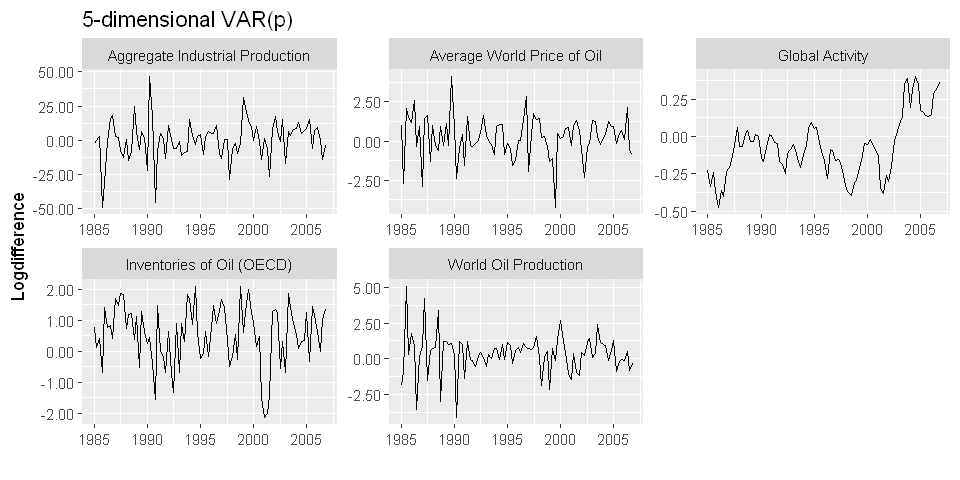

In [20]:
options(repr.plot.width=8, repr.plot.height=4, warn=-1)

p <- quarterly %>% 
  gather(variable, value, -Date) %>% 
  ggplot(aes(Date, value)) +
  geom_line() + 
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  labs(title="5-dimensional VAR(p)", x="", y="Logdifference") + 
  facet_wrap(~variable, scale="free", nrow=2)
print(p)

(a) Gøre rede for hvordan du vil bestemmet antallet af lags i den pågældende VAR.

- VI kigger på AIC og BIC, ud fra AIC ville vi vælge en model med 6 lags, men BIC foretrækker en med 1 lag, for at forsimple de efterfølgende vælger vi en model med 1 lag.

In [21]:
a1<- AIC(VAR(quarterly[,-1], p=1, type="none"))
a2 <- AIC(VAR(quarterly[,-1], p=2, type="none"))
a3 <- AIC(VAR(quarterly[,-1], p=3, type="none"))
a4 <- AIC(VAR(quarterly[,-1], p=4, type="none"))
a5 <- AIC(VAR(quarterly[,-1], p=5, type="none"))
a6 <- AIC(VAR(quarterly[,-1], p=6, type="none"))

b1 <- BIC(VAR(quarterly[,-1], p=1, type="none"))
b2 <- BIC(VAR(quarterly[,-1], p=2, type="none"))
b3 <- BIC(VAR(quarterly[,-1], p=3, type="none"))
b4 <- BIC(VAR(quarterly[,-1], p=4, type="none"))
b5 <- BIC(VAR(quarterly[,-1], p=5, type="none"))
b6 <- BIC(VAR(quarterly[,-1], p=6, type="none"))

df <- data.frame(Model=c(1:6), AIC = c(a1, a2, a3, a4,a5,a6), BIC = c(b1,b2,b3,b4,b5,b6))
as.matrix(df)

Model,AIC,BIC
1,1302.694,1364.342
2,1288.766,1411.484
3,1281.576,1464.775
4,1280.227,1523.309
5,1255.726,1558.081
6,1226.368,1587.375


(b) Angiv alle autoregressive parametre fra den estimerede VAR og den estimerede varians-kovarians matrice for residualerne.

In [22]:
data <- quarterly[,-1]
colnames(data) <- c("Oil Production", "Industrial Production", "Oil Price", "Oil Inventories", "Global Activity")
fit <- VAR(data, p=1, type="none")
round(Acoef(fit)[[1]],4)

,Oil.Production.l1,Industrial.Production.l1,Oil.Price.l1,Oil.Inventories.l1,Global.Activity.l1
Oil.Production,0.0204,0.0082,-0.2854,0.2985,-0.2403
Industrial.Production,-2.6898,-0.0363,-2.3603,4.2332,6.6479
Oil.Price,0.2219,-0.0017,-0.0183,-0.0111,-0.2804
Oil.Inventories,-0.0431,-0.0144,0.1010,0.5617,-0.4363
Global.Activity,-0.0014,0.0007,-0.0099,0.0164,0.9256


In [23]:
covm <- summary(fit)$covres
round(covm,4)

,Oil.Production,Industrial.Production,Oil.Price,Oil.Inventories,Global.Activity
Oil.Production,1.6633,-7.7097,0.5439,0.2043,0.0058
Industrial.Production,-7.7097,171.9658,-3.8636,2.3632,0.1314
Oil.Price,0.5439,-3.8636,1.6989,-0.2164,0.0070
Oil.Inventories,0.2043,2.3632,-0.2164,0.8203,0.0144
Global.Activity,0.0058,0.1314,0.0070,0.0144,0.0070


#### **Opgave 2:** Beregn og illustrer konkret følgende impulse responses over minimum 5 perioder men gerne 10

(a) Olieprisens respons som følge af et chok til olieproduktionen af størrelsen 1 standardafvigelse.

(b) Olieprisens respons som følge af et chok til olielagrene.

(c) Industriproduktionens respons som følge af et chok til olieprisen.

(d) Olieprisens respons som følge af et chok til den globale økonomiske aktivitet.

In [24]:
a0 <- diag(5)
a1 <- as.matrix(Acoef(fit)[[1]]) %^% 1
a2 <- as.matrix(Acoef(fit)[[1]]) %^% 2
a3 <- as.matrix(Acoef(fit)[[1]]) %^% 3
a4 <- as.matrix(Acoef(fit)[[1]]) %^% 4
a5 <- as.matrix(Acoef(fit)[[1]]) %^% 5
a6 <- as.matrix(Acoef(fit)[[1]]) %^% 6
a7 <- as.matrix(Acoef(fit)[[1]]) %^% 7
a8 <- as.matrix(Acoef(fit)[[1]]) %^% 8
a9 <- as.matrix(Acoef(fit)[[1]]) %^% 9
a10 <- as.matrix(Acoef(fit)[[1]]) %^% 10

dff <- data.frame(n = c(0:10),
                  A = c(a0[3,1], a1[3,1],a2[3,1],a3[3,1],a4[3,1],a5[3,1],a6[3,1],a7[3,1],a8[3,1],a9[3,1],a10[3,1]),
                  B = c(a0[3,4], a1[3,4],a2[3,4],a3[3,4],a4[3,4],a5[3,4],a6[3,4],a7[3,4],a8[3,4],a9[3,4],a10[3,4]),
                  C = c(a0[2,3], a1[2,3],a2[2,3],a3[2,3],a4[2,3],a5[2,3],a6[2,3],a7[2,3],a8[2,3],a9[2,3],a10[2,3]),
                  D = c(a0[3,5], a1[3,5],a2[3,5],a3[3,5],a4[3,5],a5[3,5],a6[3,5],a7[3,5],a8[3,5],a9[3,5],a10[3,5]))
round(as.matrix(dff),4)

n,A,B,C,D
0,0.0000,0.0000,0.0000,0.0000
1,0.2219,-0.0111,-2.3603,-0.2804
2,0.0059,0.0485,1.2582,-0.3142
3,-0.0193,0.0324,0.4450,-0.2849
4,0.0015,0.0042,-0.0544,-0.2796
5,0.0054,-0.0053,-0.0351,-0.2701
6,0.0023,-0.0068,0.0137,-0.2518
7,0.0011,-0.0076,0.0073,-0.2314
8,0.0011,-0.0080,-0.0036,-0.2118
9,0.0011,-0.0078,-0.0056,-0.1935


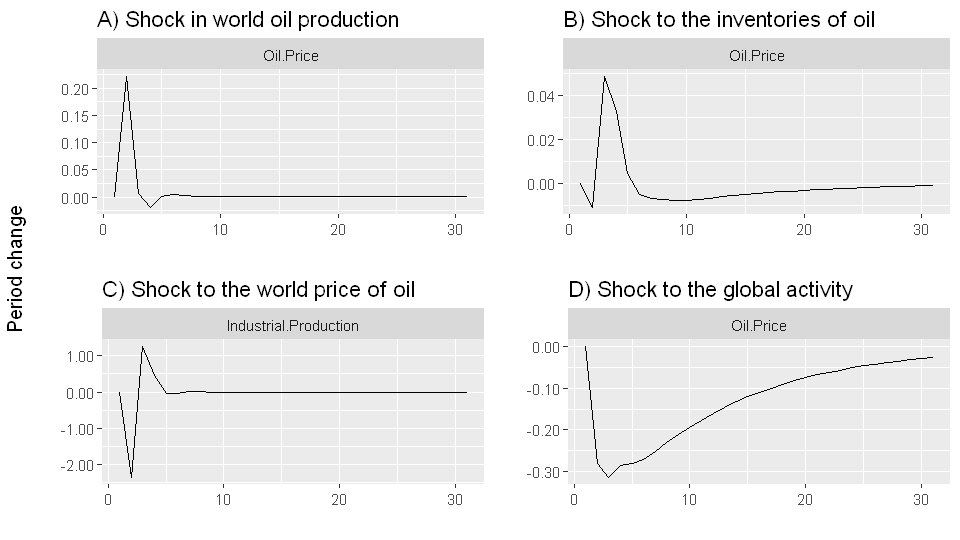

In [25]:
options(repr.plot.width=8, repr.plot.height=4.5)
#chol(covm)

a <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Production)
a$n <- c(1:31)
pa <- a %>% 
  dplyr::select(Oil.Price, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="A) Shock in world oil production", x="", y="")

b <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Inventories)
b$n <- c(1:31)
pb <- b %>% 
  dplyr::select(Oil.Price, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="B) Shock to the inventories of oil", x="", y="")

c <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Price)
c$n <- c(1:31)
pc <- c %>% 
  dplyr::select(Industrial.Production, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="C) Shock to the world price of oil", x="", y="")

d <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Global.Activity)
d$n <- c(1:31)
pd <- d %>% 
  dplyr::select(Oil.Price, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="D) Shock to the global activity", x="", y="")

grid.arrange(pa,pb,pc,pd, nrow=2, left="Period change")

(e) Hvis tiden tillader det og alle andre spørgsmÂl er (forsøgt) besvaret, sÂ overvej at akkumulere de beregnede impulse responses over tid, idet det kan vÊre lettere at vurdere summen af vækstraterne (angivet ved log-differences). Konkret kan du blot akkumulere det beregnede impulse response i successivt over tid:

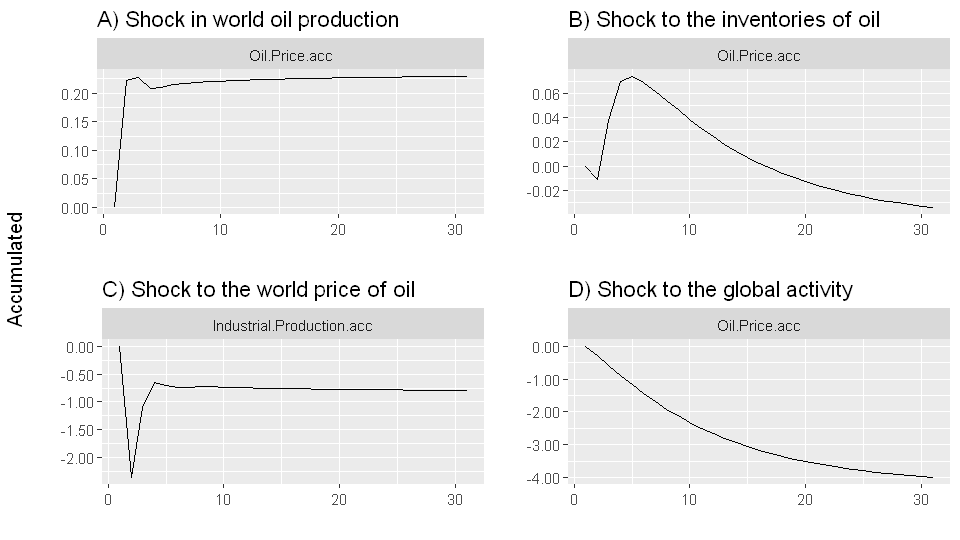

In [26]:
a <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Production)
a$n <- c(1:31)
pa <- a %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="A) Shock in world oil production", x="", y="")

b <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Inventories)
b$n <- c(1:31)
pb <- b %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="B) Shock to the inventories of oil", x="", y="")

c <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Oil.Price)
c$n <- c(1:31)
pc <- c %>% 
  mutate(Industrial.Production.acc = cumsum(Industrial.Production)) %>% 
  dplyr::select(Industrial.Production.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="C) Shock to the world price of oil", x="", y="")

d <- as.data.frame(irf(fit, n.ahead = 30, ortho = F)$irf$Global.Activity)
d$n <- c(1:31)
pd <- d %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="D) Shock to the global activity", x="", y="")

grid.arrange(pa,pb,pc,pd, nrow=2, left="Accumulated")

### Opgave 3: Kommenter på dine beregnede impulse responses. Er de som forventet og er de plausible?

Vi kigger på de akkumulerede response til shoksne:

A) Et chock i produktionen af olie i en periode øger prisen meget hurtigt, men ændringen dør hurtigt ud, det giver god inituitiv mening

B) Et chock til olielagrene øger prisen, men den falder langsomt igen, og den samlede effekt er negativ, det giver måske mindre mening, men det giver mening at prisstigningen ikke er permanent 

C) Et chock i olieprisen i en periode påvirker produktionen permament, det giver god mening

D) Et chock i den globale aktivitet virker negativt og permanent, det giver også god mening at det er over længere tid da shocks i den globale aktivitet sjældent vil kunne være lige så pludselige som chocks i olieprisen.

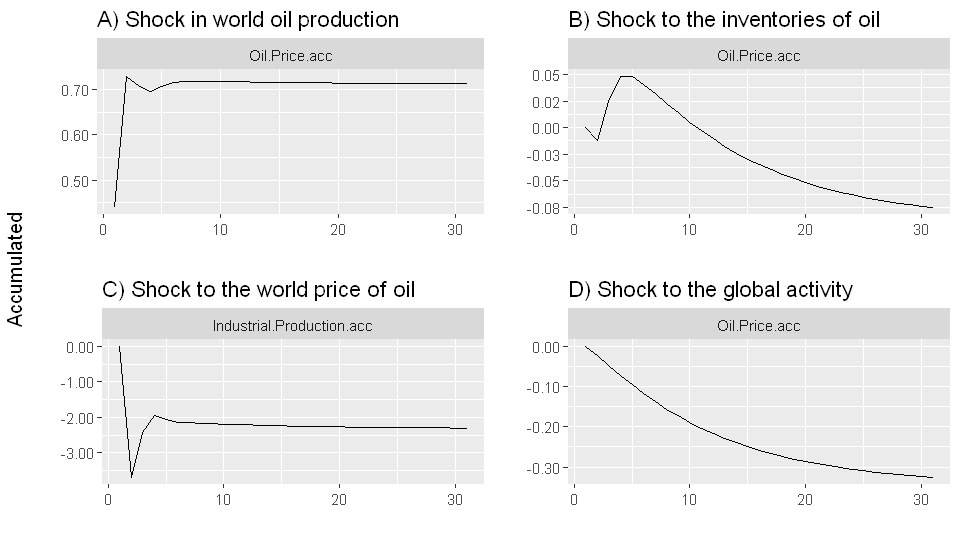

In [28]:
a <- as.data.frame(irf(fit, n.ahead = 30, ortho = T)$irf$Oil.Production)
a$n <- c(1:31)
pa <- a %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="A) Shock in world oil production", x="", y="")

b <- as.data.frame(irf(fit, n.ahead = 30, ortho = T)$irf$Oil.Inventories)
b$n <- c(1:31)
pb <- b %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="B) Shock to the inventories of oil", x="", y="")

c <- as.data.frame(irf(fit, n.ahead = 30, ortho = T)$irf$Oil.Price)
c$n <- c(1:31)
pc <- c %>% 
  mutate(Industrial.Production.acc = cumsum(Industrial.Production)) %>% 
  dplyr::select(Industrial.Production.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="C) Shock to the world price of oil", x="", y="")

d <- as.data.frame(irf(fit, n.ahead = 30, ortho = T)$irf$Global.Activity)
d$n <- c(1:31)
pd <- d %>% 
  mutate(Oil.Price.acc = cumsum(Oil.Price)) %>% 
  dplyr::select(Oil.Price.acc, n) %>% 
  gather(variable, value, -n) %>% 
  ggplot(aes(n, value)) +
  geom_line() +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  facet_wrap(~variable) +
  labs(title="D) Shock to the global activity", x="", y="")

grid.arrange(pa,pb,pc,pd, nrow=2, left="Accumulated")

In [33]:
P <- chol(covm)

a0 <- diag(5) %*% P
a1 <- as.matrix(Acoef(fit)[[1]]) %^% 1 %*% P
a2 <- as.matrix(Acoef(fit)[[1]]) %^% 2 %*% P
a3 <- as.matrix(Acoef(fit)[[1]]) %^% 3 %*% P
a4 <- as.matrix(Acoef(fit)[[1]]) %^% 4 %*% P
a5 <- as.matrix(Acoef(fit)[[1]]) %^% 5 %*% P
a6 <- as.matrix(Acoef(fit)[[1]]) %^% 6 %*% P
a7 <- as.matrix(Acoef(fit)[[1]]) %^% 7 %*% P
a8 <- as.matrix(Acoef(fit)[[1]]) %^% 8 %*% P
a9 <- as.matrix(Acoef(fit)[[1]]) %^% 9 %*% P
a10 <- as.matrix(Acoef(fit)[[1]]) %^% 10 %*% P

dff <- tibble(n = c(0:10),
                  A = c(a0[3,1], a1[3,1],a2[3,1],a3[3,1],a4[3,1],a5[3,1],a6[3,1],a7[3,1],a8[3,1],a9[3,1],a10[3,1]),
                  Acum = cumsum(A),
                  B = c(a0[3,4], a1[3,4],a2[3,4],a3[3,4],a4[3,4],a5[3,4],a6[3,4],a7[3,4],a8[3,4],a9[3,4],a10[3,4]),
                  Bcum = cumsum(B),
                  C = c(a0[2,3], a1[2,3],a2[2,3],a3[2,3],a4[2,3],a5[2,3],a6[2,3],a7[2,3],a8[2,3],a9[2,3],a10[2,3]),
                  Ccum = cumsum(C),
                  D = c(a0[3,5], a1[3,5],a2[3,5],a3[3,5],a4[3,5],a5[3,5],a6[3,5],a7[3,5],a8[3,5],a9[3,5],a10[3,5]),
                  Dcum = cumsum(D),)
round(as.matrix(dff),4)

n,A,Acum,B,Bcum,C,Ccum,D,Dcum
0,0.0000,0.0000,-0.2041,-0.2041,-0.1150,-0.1150,0.0055,0.0055
1,0.2862,0.2862,0.0293,-0.1747,-4.0284,-4.1434,-0.0219,-0.0165
2,0.0076,0.2938,0.0529,-0.1218,1.2696,-2.8738,-0.0250,-0.0415
3,-0.0249,0.2689,0.0227,-0.0992,0.7124,-2.1614,-0.0227,-0.0642
4,0.0020,0.2709,0.0007,-0.0985,-0.0051,-2.1664,-0.0225,-0.0867
5,0.0069,0.2778,-0.0045,-0.1029,-0.0536,-2.2201,-0.0219,-0.1086
6,0.0030,0.2808,-0.0055,-0.1084,0.0089,-2.2112,-0.0204,-0.1290
7,0.0014,0.2822,-0.0063,-0.1147,0.0083,-2.2029,-0.0188,-0.1478
8,0.0014,0.2837,-0.0066,-0.1213,-0.0056,-2.2085,-0.0172,-0.1650
9,0.0014,0.2850,-0.0065,-0.1278,-0.0094,-2.2179,-0.0157,-0.1808


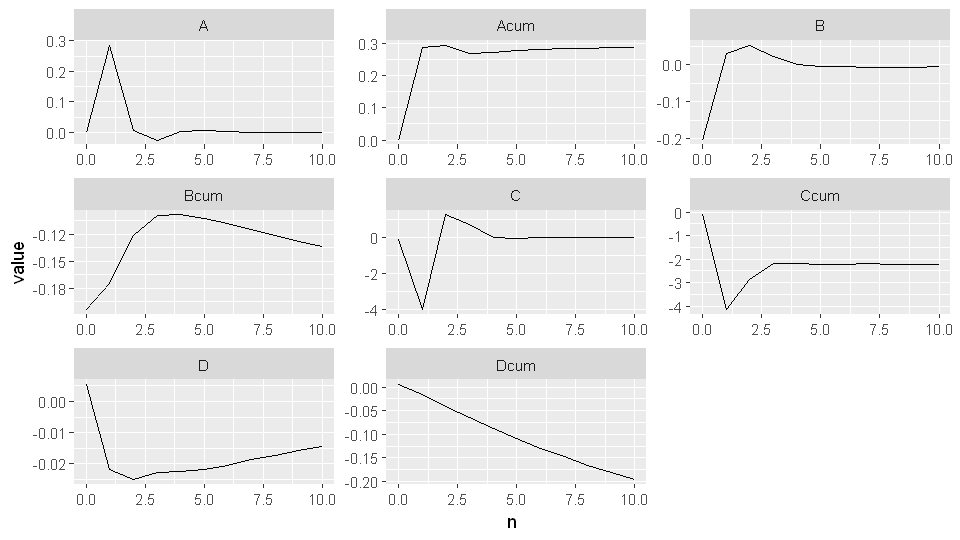

In [38]:
dff %>%
gather(variable, value, -n) %>%
ggplot(aes(n, value)) +
geom_line() +
facet_wrap(~variable, scale="free")